In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Line Graph

0     1990
3     1993
6     1996
9     1999
12    2002
15    2005
18    2008
Name: Year, dtype: int64


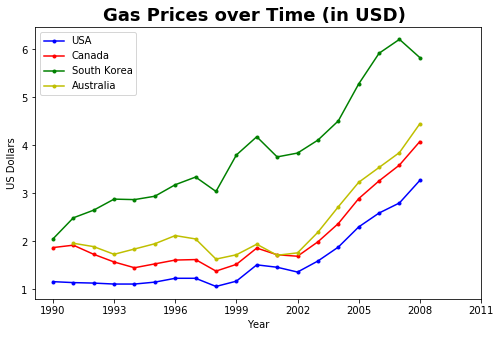

In [59]:
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(8,5)) #make the graph bigger

plt.title('Gas Prices over Time (in USD) ', fontdict={'fontweight': 'bold', 'fontsize':18}) #font make it bold

#add labels if no legend appears
# 'b.-' means you add blue color and add points on line with -
plt.plot(gas.Year, gas.USA, 'b.-', label = 'USA')  
plt.plot(gas.Year, gas.Canada, 'r.-', label = 'Canada')
plt.plot(gas.Year, gas['South Korea'],'g.-' , label = 'South Korea') #add this bracket in South Korea beacuse of the space in country name
plt.plot(gas.Year, gas.Australia, 'y.-', label = 'Australia')

# Another Way to plot many values!
# countries_to_look_at = ['Australia', 'USA', 'Canada', 'South Korea']
# for country in gas: #check each country so that the process is automated
#     if country in countries_to_look_at: #specify selected countries
#     #if country != 'Year': #specify all countries
#         plt.plot(gas.Year,gas[country], marker= '.', label= country) #marker gives you the points on the line


print(gas.Year[::3]) #we want to get every third year, use pyhthon code to check

# change the tick marks on x axis
plt.xticks(gas.Year[::3].tolist()+[2011]) #add 2011, as list [] because dataframe and use tolist to make formatting work

plt.xlabel('Year')
plt.ylabel('US Dollars')

plt.legend()

plt.savefig('Gas_price_figure', dpi=300) #save the file with good resolution dpi=300

plt.show()

## Load Fifa Data

In [60]:
fifa = pd.read_csv('fifa_data.csv')

fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Histogram

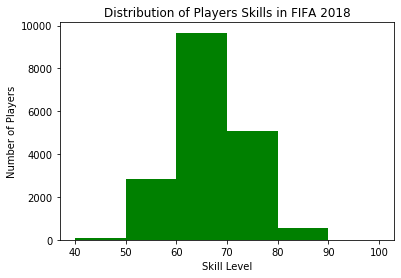

In [73]:
bins = [40,50,60,70,80,90,100] #use bin buckets to group players skill level overall

plt.hist(fifa.Overall, bins=bins, color='green') #you also search for color picker in google and insert a hex code with#

plt.xticks(bins)

plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Distribution of Players Skills in FIFA 2018')

plt.show()

### Pie Charts

<function matplotlib.pyplot.show(*args, **kw)>

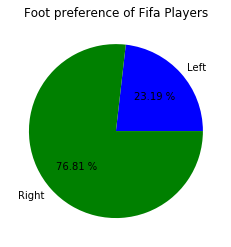

In [101]:
left = fifa.loc[fifa['Preferred Foot']== 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot']== 'Right'].count()[0] #how many players prefer their right foot usu [0] to get total count otwerwise you get an array since this is a dataframe

labels = ['Left', 'Right']
colors = ['blue', 'green']

#plt.pie(fifa['Preferred Foot']) this does not work because pie require numbers in ()
plt.pie([left, right], labels= labels, colors=colors, autopct='%.2f %%')

plt.title('Foot preference of Fifa Players')

plt.show

### Pie Chart 2

In [118]:
fifa.Weight =[int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight] #use this to remove lbs from weight to get integers

In [119]:
fifa.Weight[0] #check  if it's a integer[0] gives you the total

159.0

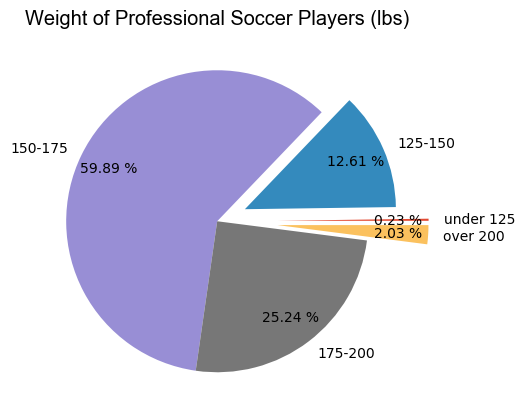

In [129]:
plt.figure(figsize=(8,5), dpi=100)

plt.style.use('ggplot') #chooses a diffrent color scheme to the default colors

light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa[fifa.Weight >= 200].count()[0]

weights = [light,light_medium, medium, medium_heavy, heavy]
label = ['under 125', '125-150', '150-175', '175-200', 'over 200']
explode = (.4,.2,0,0,.4) #break apart some of the above wedges 

afont = {'fontname':'Arial'} #change the font of title to Arial and insert below or write just fontname='Arial' as below 

plt.title('Weight of Professional Soccer Players (lbs)',fontname='Arial')

plt.pie(weights, labels=label, explode=explode, pctdistance=0.8,autopct='%.2f %%')
plt.show()

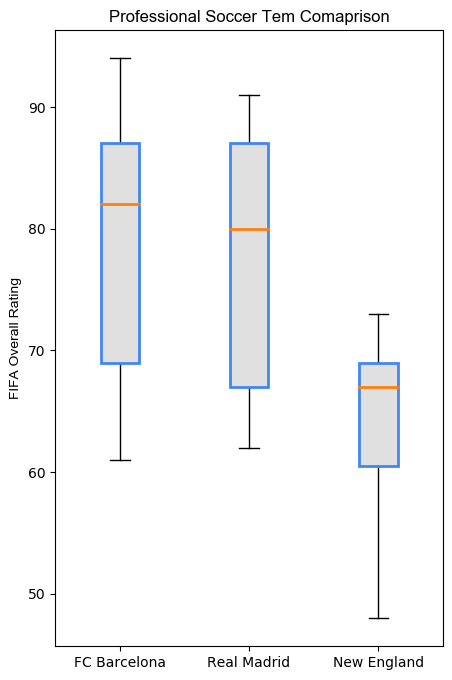

In [179]:
plt.style.use('default') #change back to original check above change

plt.figure(figsize=(5,8)) #5 is the x axis and 8 is the y axis

barcelona = fifa.loc[fifa.Club== 'FC Barcelona']['Overall'] #you want to filter on barca and the show the a series of the barca Overall skills
madrid= fifa.loc[fifa.Club== 'Real Madrid']['Overall'] #comapre to barca
new_england= fifa.loc[fifa.Club== 'New England Revolution']['Overall']


boxes = plt.boxplot([barcelona, madrid, new_england], labels=['FC Barcelona','Real Madrid','New England'], 
patch_artist=True, medianprops={'linewidth': 2}) #use patch_artist to get the fill color to work below, medianprops is the line inside the box we want it to have the same thickness as the rest

plt.title('Professional Soccer Tem Comaprison', afont)
plt.ylabel('FIFA Overall Rating', afont)


for box in boxes['boxes']:   #you get the box parameter of what was saved in boxes['boxes']
    # change outline color
    box.set(color='#4286f4', linewidth=2)
    # change fill color
    box.set(facecolor = '#e0e0e0' )
    # change hatch
    #box.set(hatch = '/')

plt.show()